In [1]:
import pandas as pd

In [2]:
macbook = pd.read_csv('data/macbook.csv')
print(macbook.shape)

(80, 2)


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

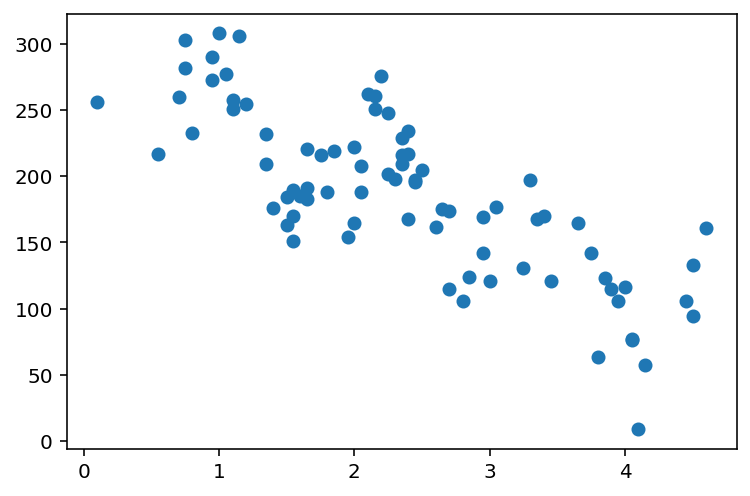

In [4]:
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [6]:
import numpy as np
np.corrcoef(macbook['used_years'], macbook['price'])

array([[ 1.        , -0.78972238],
       [-0.78972238,  1.        ]])

In [7]:
x = macbook["used_years"].values
y = macbook["price"].values

In [8]:
def model(x, w, b):
    y = w * x + b
    return y

In [9]:
model(5, 2, 1)

11

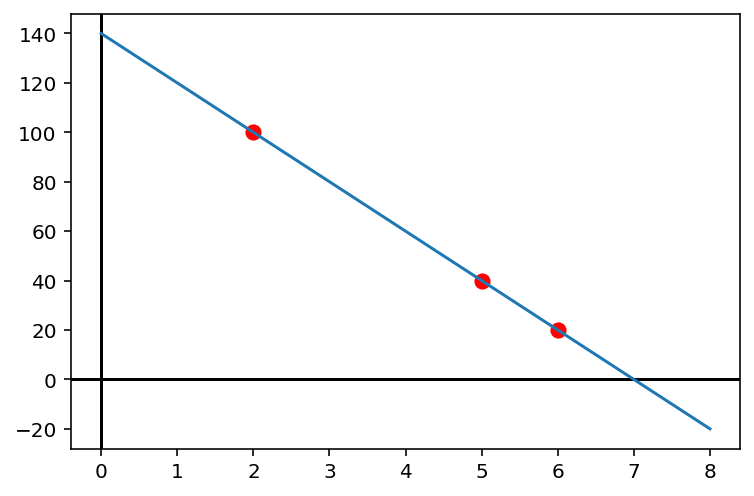

In [10]:
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')

x = np.linspace(0, 8, 9)
y = model(x, w=-20, b=140)
plt.plot(y)

x_data = [2, 5, 6]
y_data = [100, 40, 20]
plt.scatter(x_data, y_data, c='r', s=50)

plt.show()

손실함수 구하기

In [11]:
w = 3.1
b = 2.3

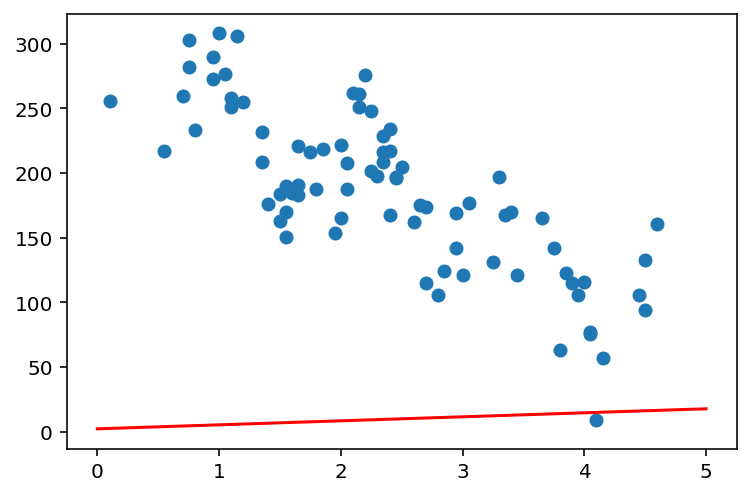

In [12]:
x = np.linspace(0, 5, 6)
y = model(x, w, b) # y = 3.1x + 2.3
plt.plot(y, c='r')

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [13]:
x = macbook["used_years"].values
x

array([2.65, 3.8 , 0.95, 4.5 , 4.45, 2.7 , 3.05, 2.25, 2.3 , 1.85, 1.5 ,
       0.95, 2.6 , 0.55, 2.05, 0.75, 3.95, 2.8 , 2.05, 1.15, 1.35, 3.35,
       1.35, 2.45, 2.4 , 0.1 , 3.45, 2.35, 0.7 , 1.05, 1.75, 4.1 , 4.5 ,
       4.  , 2.  , 2.45, 2.5 , 2.1 , 3.  , 4.05, 2.7 , 2.15, 3.3 , 2.4 ,
       2.85, 1.65, 1.55, 2.15, 3.4 , 1.55, 0.8 , 2.95, 2.4 , 1.4 , 1.65,
       2.25, 3.85, 3.9 , 4.6 , 2.35, 4.05, 1.2 , 1.95, 1.6 , 2.  , 1.8 ,
       3.75, 3.65, 2.35, 2.2 , 1.  , 4.15, 1.1 , 1.55, 2.95, 1.5 , 1.65,
       1.1 , 3.25, 0.75])

In [14]:
prediction = model(x, w, b)
prediction

array([10.515, 14.08 ,  5.245, 16.25 , 16.095, 10.67 , 11.755,  9.275,
        9.43 ,  8.035,  6.95 ,  5.245, 10.36 ,  4.005,  8.655,  4.625,
       14.545, 10.98 ,  8.655,  5.865,  6.485, 12.685,  6.485,  9.895,
        9.74 ,  2.61 , 12.995,  9.585,  4.47 ,  5.555,  7.725, 15.01 ,
       16.25 , 14.7  ,  8.5  ,  9.895, 10.05 ,  8.81 , 11.6  , 14.855,
       10.67 ,  8.965, 12.53 ,  9.74 , 11.135,  7.415,  7.105,  8.965,
       12.84 ,  7.105,  4.78 , 11.445,  9.74 ,  6.64 ,  7.415,  9.275,
       14.235, 14.39 , 16.56 ,  9.585, 14.855,  6.02 ,  8.345,  7.26 ,
        8.5  ,  7.88 , 13.925, 13.615,  9.585,  9.12 ,  5.4  , 15.165,
        5.71 ,  7.105, 11.445,  6.95 ,  7.415,  5.71 , 12.375,  4.625])

In [15]:
macbook['prediction'] = prediction
macbook.head()

,used_years,price,prediction
0,2.65,175,10.515
1,3.80,63,14.080
2,0.95,273,5.245
3,4.50,133,16.250
4,4.45,106,16.095


In [16]:
macbook['error'] = macbook['price'] - macbook['prediction']
macbook.head()

,used_years,price,prediction,error
0,2.65,175,10.515,164.485
1,3.80,63,14.080,48.920
2,0.95,273,5.245,267.755
3,4.50,133,16.250,116.750
4,4.45,106,16.095,89.905


In [17]:
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()
    rmse = mse ** 0.5 
    return rmse

In [19]:
rmse = RMSE(predictions, y)
rmse

188.81322969819274

In [54]:
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L

In [37]:
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db

In [42]:
lr = 1
losses = []

In [47]:
x = macbook["used_years"].values
y = macbook["price"].values

In [48]:
w = 3.1
b = 2.3

In [55]:
for i in range(1, 2001):
    dw, db = gradient(x, w, b, y)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
    w -= lr * dw         # 5번: w = w - η * dw 로 업데이트
    b -= lr * db         # 5번: b = b - η * db 로 업데이트 
    L = loss(x, w, b, y)            # 현재의 loss 값 계산
    losses.append(L)                # loss 값 기록
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 108.0059
Iteration 200 : Loss 94.5663
Iteration 300 : Loss 81.8490
Iteration 400 : Loss 70.1706
Iteration 500 : Loss 59.9668
Iteration 600 : Loss 51.7360
Iteration 700 : Loss 45.8251
Iteration 800 : Loss 42.1391
Iteration 900 : Loss 40.1298
Iteration 1000 : Loss 39.1381
Iteration 1100 : Loss 38.6767
Iteration 1200 : Loss 38.4686
Iteration 1300 : Loss 38.3761
Iteration 1400 : Loss 38.3353
Iteration 1500 : Loss 38.3174
Iteration 1600 : Loss 38.3096
Iteration 1700 : Loss 38.3062
Iteration 1800 : Loss 38.3047
Iteration 1900 : Loss 38.3041
Iteration 2000 : Loss 38.3038


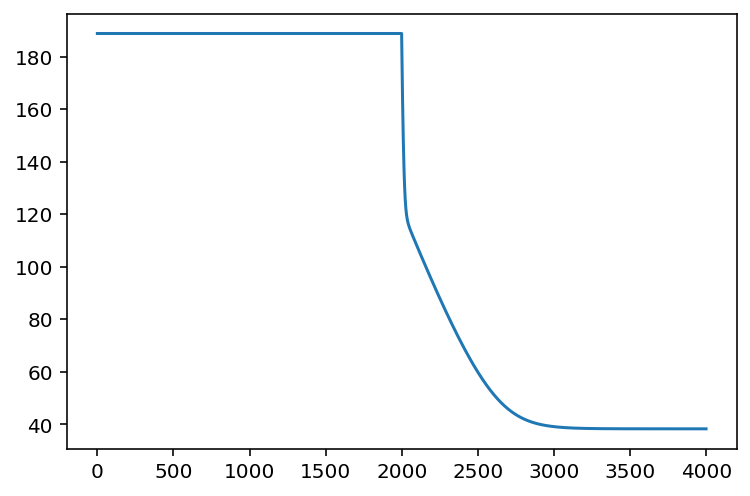

In [56]:
plt.plot(losses)
plt.show()

In [57]:
w, b

(-44.94590000417761, 293.12003239124147)

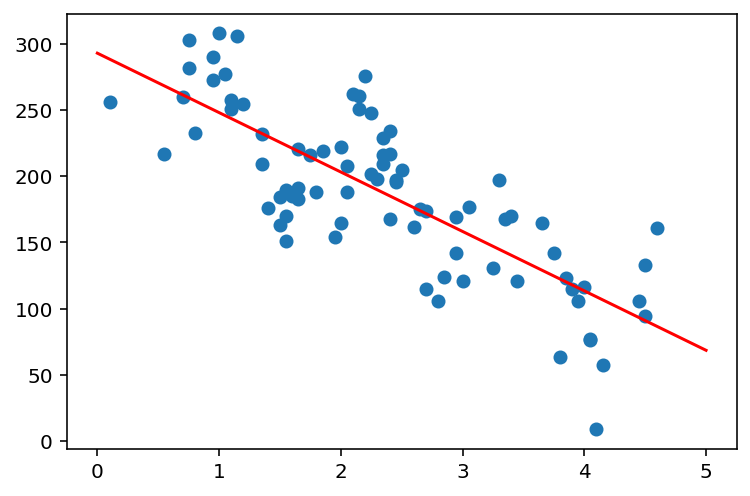

In [58]:
x = np.linspace(0, 5, 6)

y = model(x, w, b)

plt.plot(y, c="r")
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [59]:
test = pd.read_csv('data/macbook_test.csv')
print(test.shape)

(20, 2)


In [60]:
test_x = test['used_years'].values
test_y = test['price'].values

In [61]:
prediction = model(test_x, w, b)
test['prediction'] = prediction
test

,used_years,price,prediction
0,1.20,203,239.184952
1,1.85,206,209.970117
2,2.40,191,185.249872
3,2.85,164,165.024217
4,3.05,176,156.035037
5,3.35,136,142.551267
6,2.55,133,178.507987
7,2.60,181,176.260692
8,2.50,181,180.755282
9,3.10,86,153.787742


In [62]:
test['error'] = test['price'] - test['prediction']
test

,used_years,price,prediction,error
0,1.20,203,239.184952,-36.184952
1,1.85,206,209.970117,-3.970117
2,2.40,191,185.249872,5.750128
3,2.85,164,165.024217,-1.024217
4,3.05,176,156.035037,19.964963
5,3.35,136,142.551267,-6.551267
6,2.55,133,178.507987,-45.507987
7,2.60,181,176.260692,4.739308
8,2.50,181,180.755282,0.244718
9,3.10,86,153.787742,-67.787742


In [63]:
rmse = ((test['error'] ** 2).sum() / len(test)) ** 0.5
rmse

45.041224680306726

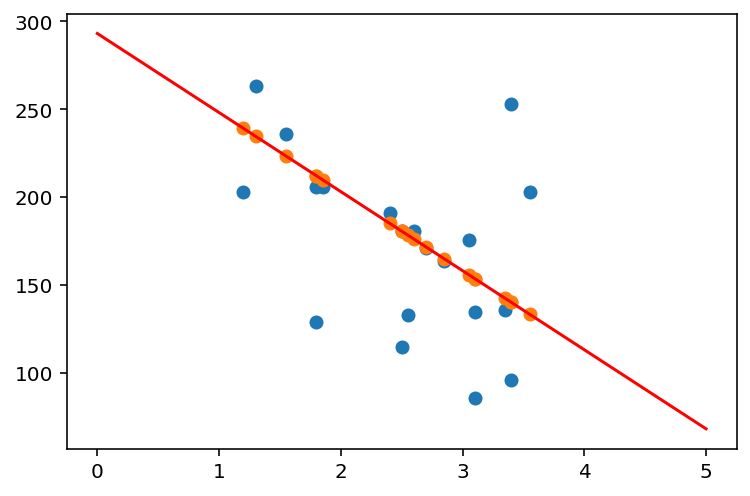

In [64]:
# 모델 일차함수 그리기
x = np.linspace(0, 5, 6)
y = model(x, w, b)
plt.plot(y, c="r")

# 실제 데이터 값
plt.scatter(test['used_years'], test['price'])

# 모델이 예측한 값
plt.scatter(test['used_years'], test['prediction'])
plt.show()